<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Data%20Analysis/Level%202/eda_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA Workflow

_**Exploratory Data Analysis**_

Exploratory Data Analysis (EDA) is the process of summarizing the main characteristics of a dataset. It helps you **understand the data**, **spot patterns**, **detect outliers**, and **generate hypotheses**. This notebook demonstrates a typical EDA workflow using a sample dataset created from scratch.

## Key steps
1. Data overview
2. Checking missing values & data types
3. Descriptive statistics
4. Visualizations
5. Hypothesis generation


## Step 1: Import Libraries and Create Sample Dataset





In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Setting style
sns.set(style="whitegrid")

# Sample dataset: 100 people with random attributes
np.random.seed(42)
df = pd.DataFrame({
    "Age": np.random.randint(18, 60, 100),
    "Gender": np.random.choice(["Male", "Female"], size=100),
    "Income": np.random.normal(loc=50000, scale=15000, size=100).astype(int),
    "Department": np.random.choice(["HR", "Tech", "Marketing"], size=100),
    "Satisfaction_Score": np.random.uniform(1, 10, 100).round(2),
})

# Introduce missing values for demonstration
df.loc[5:10, "Income"] = np.nan
df.loc[20, "Department"] = np.nan

df.head()

,Age,Gender,Income,Department,Satisfaction_Score
0,56,Male,79176.0,HR,2.66
1,46,Female,47699.0,HR,1.73
2,32,Female,36395.0,HR,4.85
3,25,Female,37739.0,Tech,7.20
4,38,Male,42753.0,HR,1.52


## Step 2: Data Overview

In [3]:
# Shape of the dataset
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# View column names
print("\nColumns:\n", df.columns.tolist())

# Basic info about each column
df.info()

# First few rows of data
df.head()

Rows: 100, Columns: 5

Columns:
 ['Age', 'Gender', 'Income', 'Department', 'Satisfaction_Score']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 100 non-null    int64  
 1   Gender              100 non-null    object 
 2   Income              94 non-null     float64
 3   Department          99 non-null     object 
 4   Satisfaction_Score  100 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.0+ KB


,Age,Gender,Income,Department,Satisfaction_Score
0,56,Male,79176.0,HR,2.66
1,46,Female,47699.0,HR,1.73
2,32,Female,36395.0,HR,4.85
3,25,Female,37739.0,Tech,7.20
4,38,Male,42753.0,HR,1.52


## Step 3: Missing Values and Data Types

In [4]:
# Count missing values in each column
print("\nMissing Values:\n", df.isnull().sum())

# Data types of each column
print("\nData Types:\n", df.dtypes)


Missing Values:
 Age                   0
Gender                0
Income                6
Department            1
Satisfaction_Score    0
dtype: int64

Data Types:
 Age                     int64
Gender                 object
Income                float64
Department             object
Satisfaction_Score    float64
dtype: object


## Step 4: Descriptive Statistics

In [5]:
# Numerical columns summary
print("\nDescriptive Stats (Numerical):\n")
print(df.describe())

# Categorical columns summary
print("\nDescriptive Stats (Categorical):\n")
print(df.describe(include='object'))


Descriptive Stats (Numerical):

              Age        Income  Satisfaction_Score
count  100.000000     94.000000          100.000000
mean    37.910000  50778.404255            5.442300
std     12.219454  15442.827964            2.586756
min     18.000000   6808.000000            1.140000
25%     26.750000  42008.500000            3.227500
50%     38.000000  51400.000000            5.580000
75%     46.250000  60880.500000            7.210000
max     59.000000  84100.000000            9.820000

Descriptive Stats (Categorical):

       Gender Department
count     100         99
unique      2          3
top      Male       Tech
freq       57         38


## Step 5: Visualizations

### 1. Histogram: Age Distribution

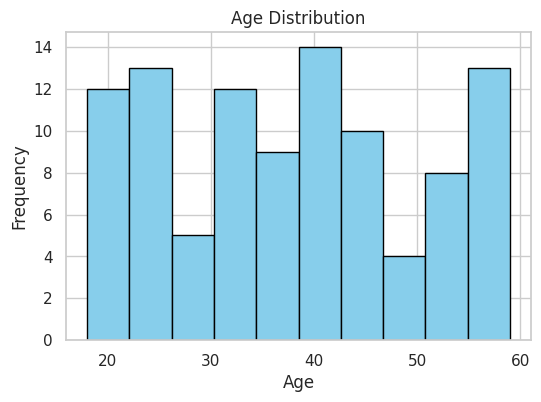

In [6]:
plt.figure(figsize=(6, 4))
df["Age"].hist(bins=10, color="skyblue", edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### 2. Boxplot: Income by Department

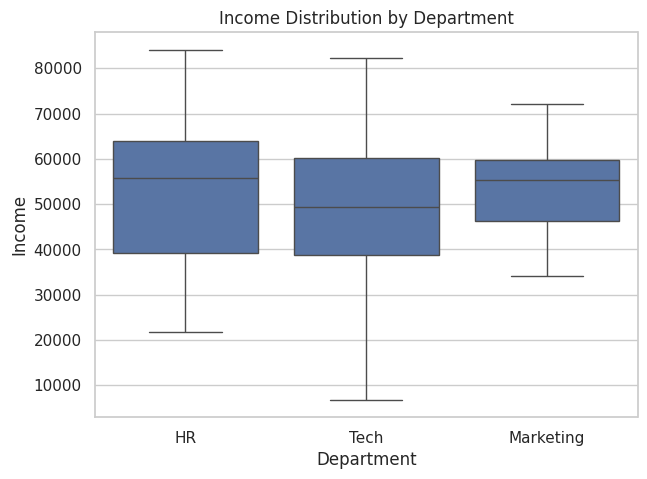

In [7]:
plt.figure(figsize=(7, 5))
sns.boxplot(x="Department", y="Income", data=df)
plt.title("Income Distribution by Department")
plt.show()

### 3. Correlation Heatmap (Numerical Columns)

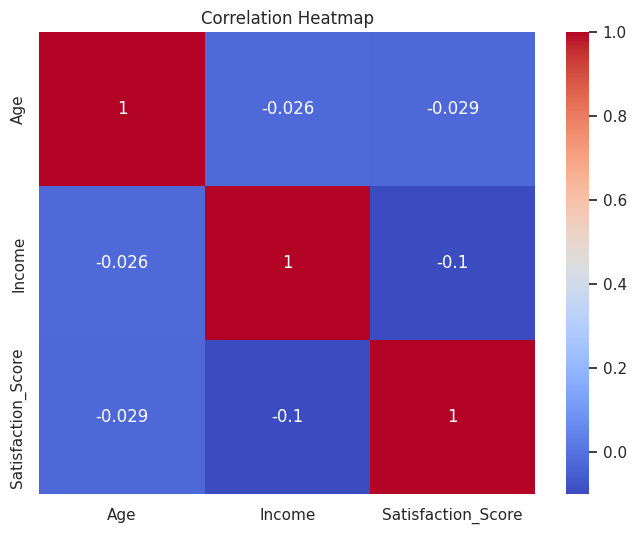

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Step 6: Hypothesis Generation

In [9]:
# Hypothesis 1: Older employees might have higher income
# Hypothesis 2: Satisfaction score might be lower in specific departments
# Hypothesis 3: Gender could influence satisfaction or income levels

# Let's check average satisfaction score by department
print("\nAverage Satisfaction by Department:\n")
print(df.groupby("Department")["Satisfaction_Score"].mean())

# Let's check average income by age group
df["Age_Group"] = pd.cut(df["Age"], bins=[17, 30, 40, 50, 60], labels=["18-30", "31-40", "41-50", "51-60"])
print("\nAverage Income by Age Group:\n")
print(df.groupby("Age_Group")["Income"].mean())


Average Satisfaction by Department:

Department
HR           5.069655
Marketing    5.780938
Tech         5.477368
Name: Satisfaction_Score, dtype: float64

Average Income by Age Group:

Age_Group
18-30    53193.214286
31-40    46844.652174
41-50    53979.956522
51-60    48239.700000
Name: Income, dtype: float64


/tmp/ipython-input-2577141381.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("Age_Group")["Income"].mean())


## Summary
- We created a synthetic dataset simulating employee info.
- Performed EDA steps: overview, cleaning, statistics, visualization.
- Generated hypotheses based on patterns in the data.